In [35]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [36]:
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

In [53]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [37]:
X = df.drop(columns=['target'])
y = df['target']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # elimizdeki verileri standartlaştırmak için kullanıyoruz
X_train = scaler.fit_transform(X_train) # fit_transform ile standartlaştırması gereken verileri öğreniyoruz ve aynı zamanda dönüştürüyoruz
X_test = scaler.transform(X_test)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [41]:
y_pred = model.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.2f}')

Accuracy: 0.95


In [43]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[ 59,   4],
       [  4, 104]], dtype=int64)

<Axes: >

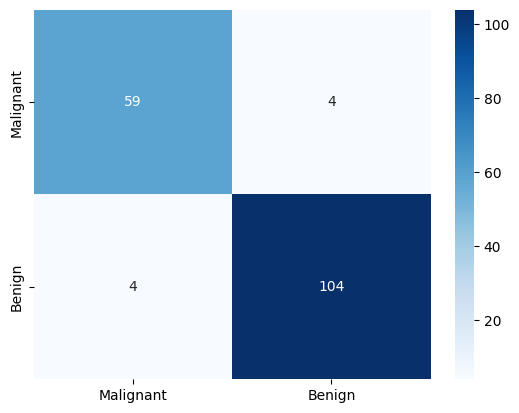

In [44]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])


In [45]:
"""
    KNN : Hyperparameter = K
    K : 1,2,3 ... N
    Accuracy : %A, %B, %C ...
"""

accuracy_scores = []
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append((k, acc))
    print(f'Accuracy for k={k}: {acc:.2f}')

Accuracy for k=1: 0.95
Accuracy for k=2: 0.95
Accuracy for k=3: 0.96
Accuracy for k=4: 0.96
Accuracy for k=5: 0.96
Accuracy for k=6: 0.96
Accuracy for k=7: 0.96
Accuracy for k=8: 0.96
Accuracy for k=9: 0.97
Accuracy for k=10: 0.97
Accuracy for k=11: 0.97
Accuracy for k=12: 0.97
Accuracy for k=13: 0.96
Accuracy for k=14: 0.96
Accuracy for k=15: 0.95
Accuracy for k=16: 0.96
Accuracy for k=17: 0.95
Accuracy for k=18: 0.96
Accuracy for k=19: 0.95
Accuracy for k=20: 0.95


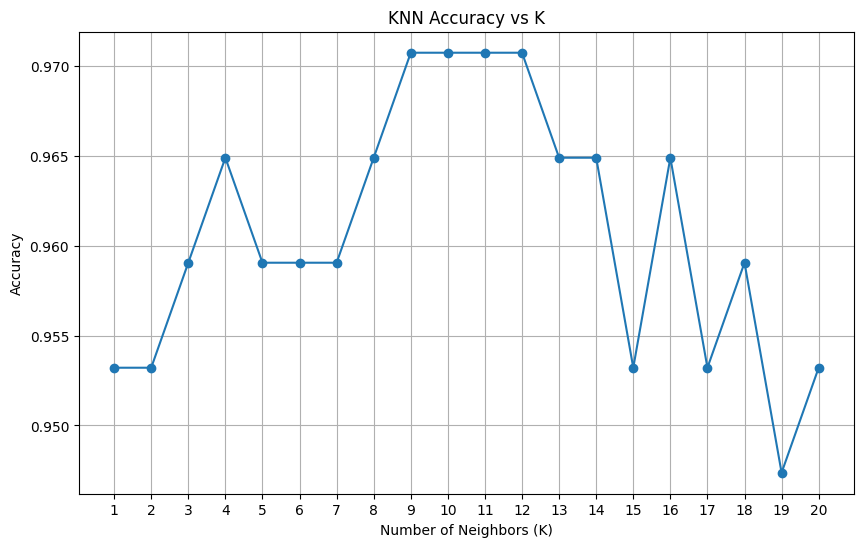

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot([k for k, acc in accuracy_scores], [acc for k, acc in accuracy_scores], marker='o')
plt.title('KNN Accuracy vs K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 21))
plt.grid()
plt.show()

In [47]:
model = KNeighborsClassifier(n_neighbors=9) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Final Accuracy with k=9: {acc:.2f}')

Final Accuracy with k=9: 0.97


<Axes: >

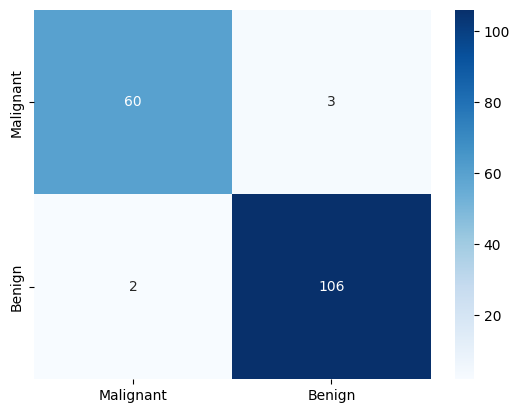

In [48]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])

In [52]:
import joblib
joblib.dump(model, 'knn_breast_cancer_model.pkl')
joblib.dump(scaler, 'scaler_breast_cancer.pkl')

['scaler_breast_cancer.pkl']